## 금융사기 예측
- 데이터셋 : creditcard
- 목적 : 금융사기 예측
- 피쳐 : 

[1] 모듈 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[2] 데이터 준비

In [6]:
file_path = r'C:\Users\KDP15\Downloads\creditcard.csv'
df = pd.read_csv(file_path)
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [69]:
df.isna().sum().value_counts()

0    31
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


클래스 불균형 시각화

In [85]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

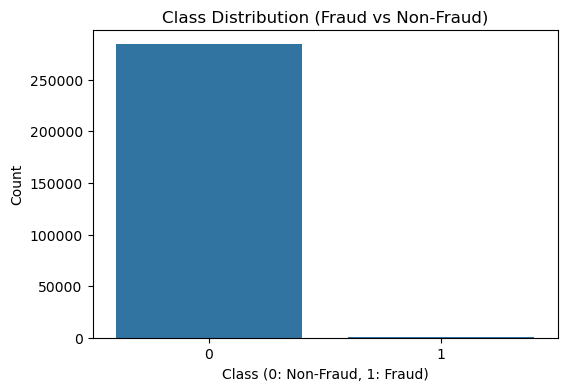

In [62]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

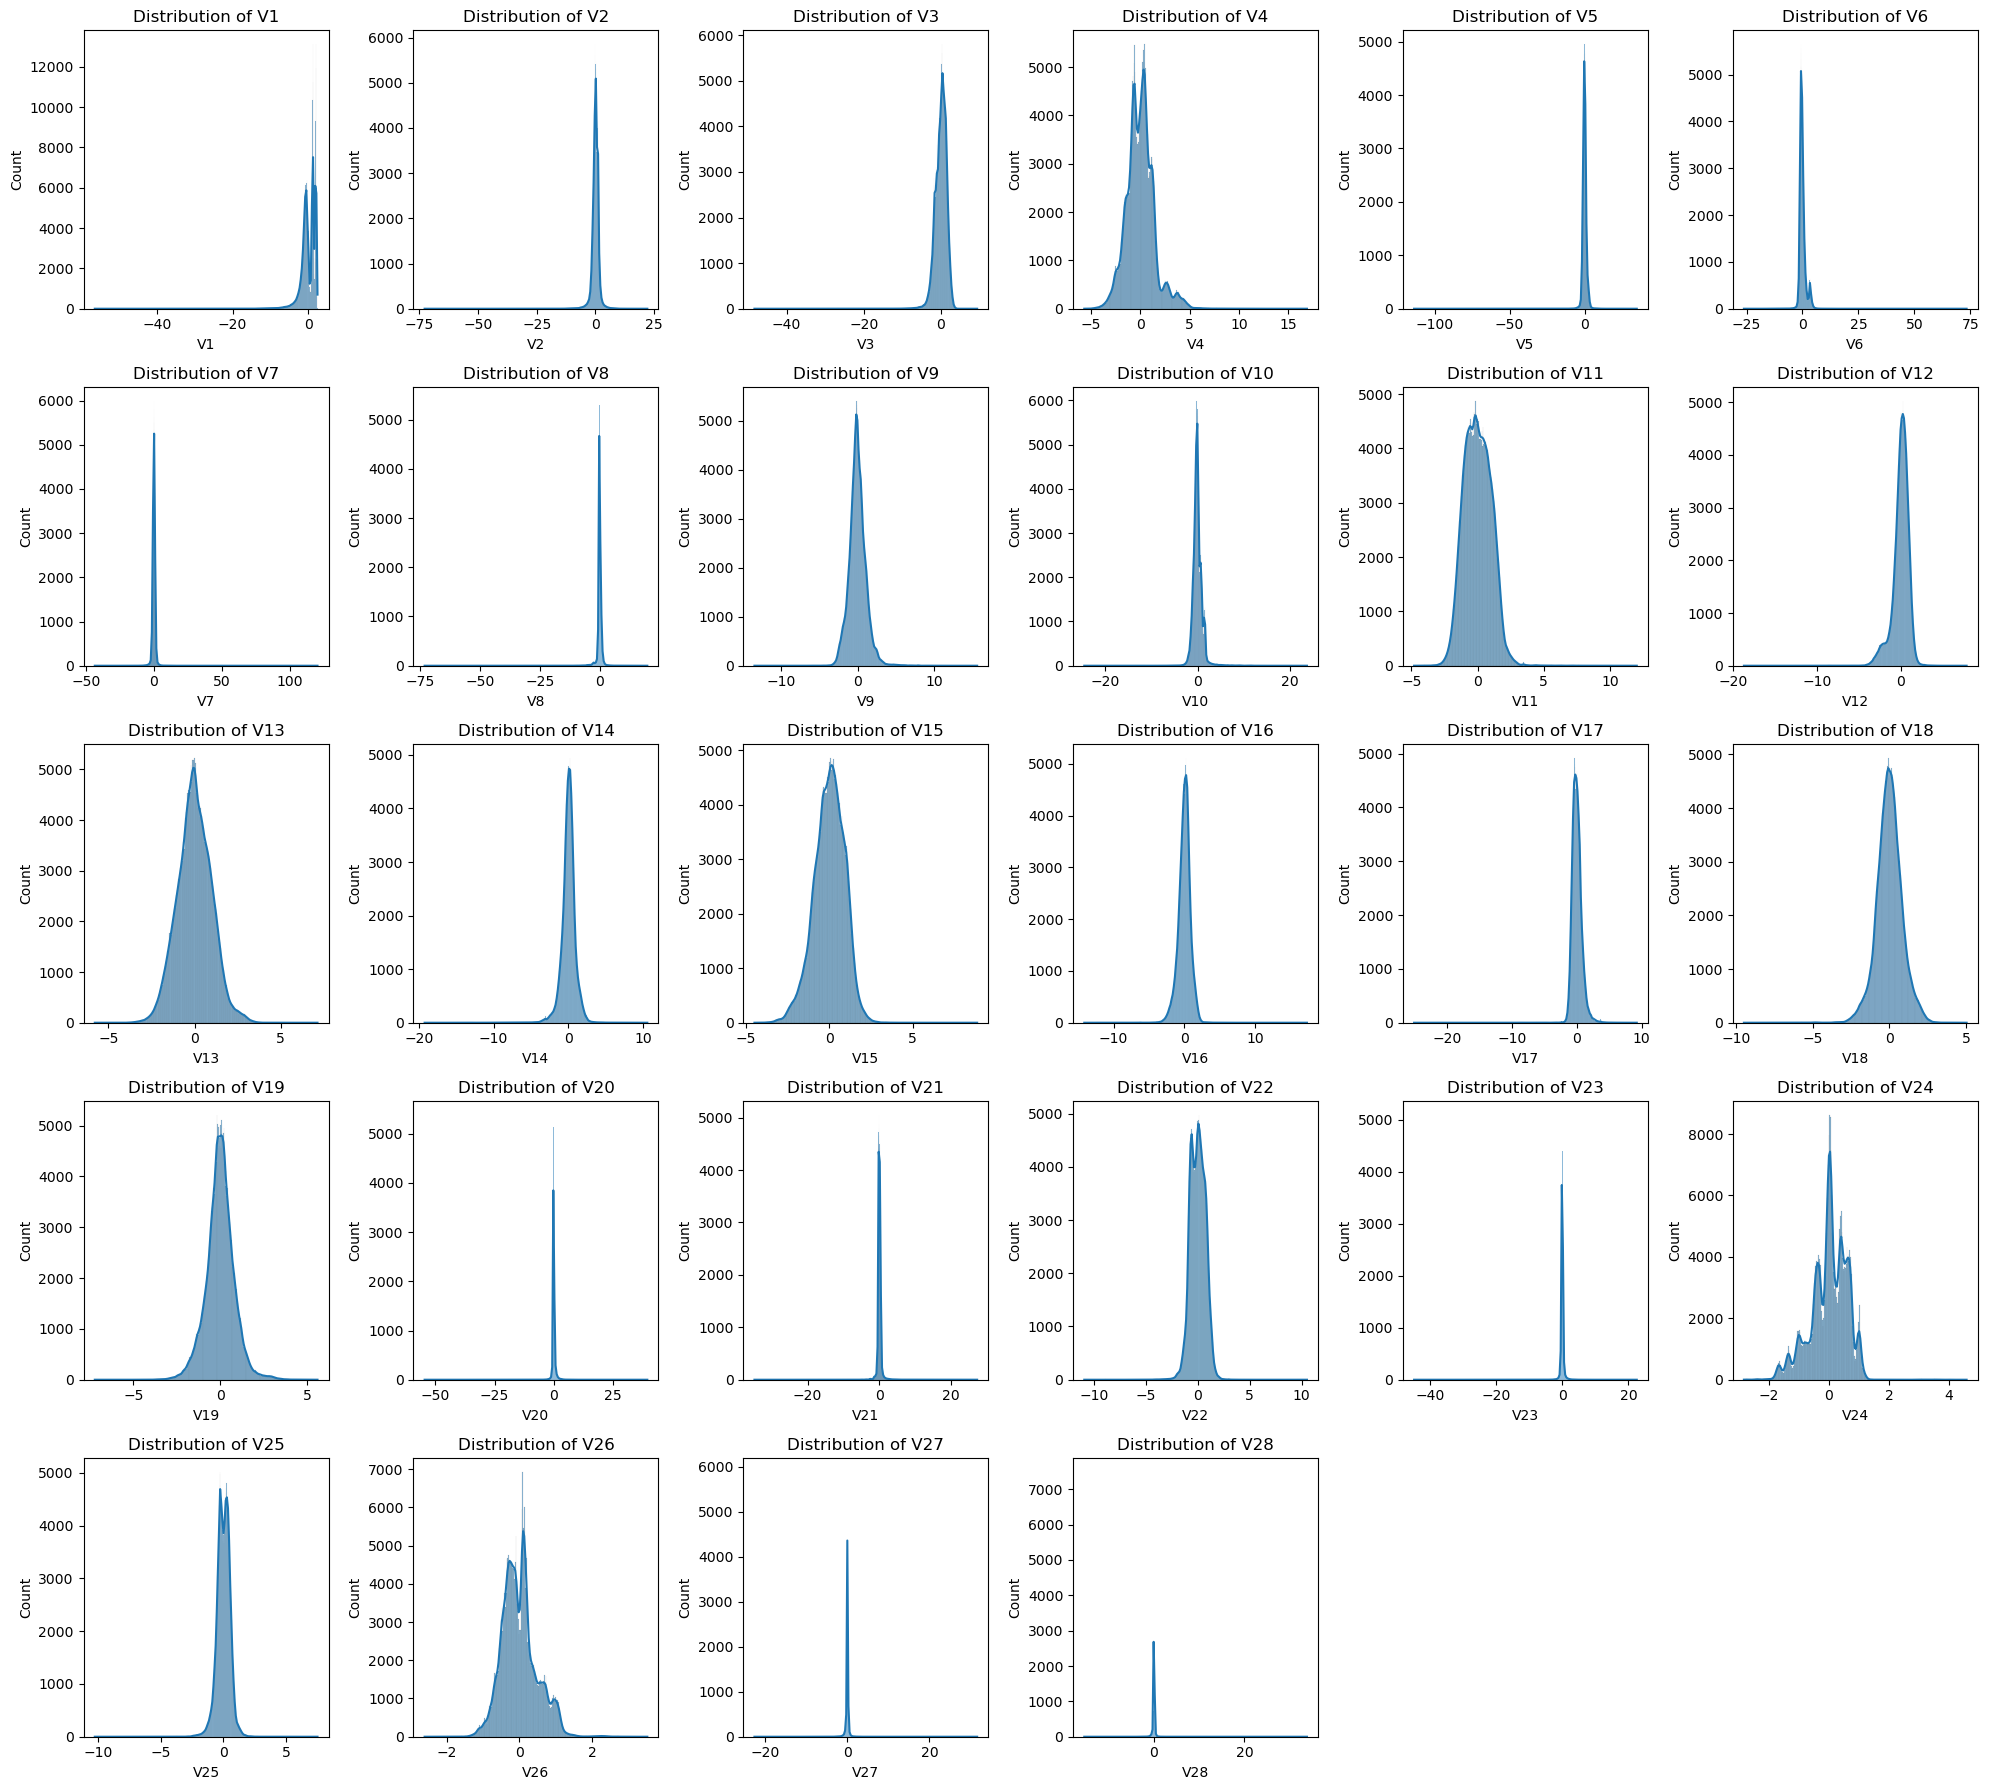

In [84]:
attributes = df.columns[1:29]  # Time과 Class를 제외한 변수들
plt.figure(figsize=(20, 18))
for i, var in enumerate(attributes, 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

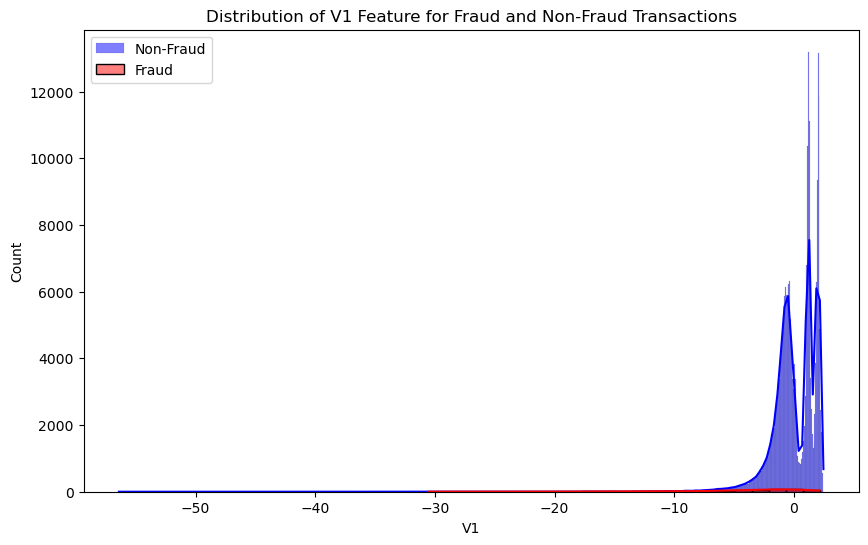

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['V1'], color="blue", kde=True, label="Non-Fraud")
sns.histplot(df[df['Class'] == 1]['V1'], color="red", kde=True, label="Fraud")
plt.title("Distribution of V1 Feature for Fraud and Non-Fraud Transactions")
plt.legend()
plt.show()

In [9]:
# 특징과 레이블 분리
X = df.drop('Class', axis=1)
y = df['Class']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [72]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [11]:
y_train_res.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

In [12]:
from sklearn.utils import resample

In [13]:
from sklearn.utils import resample

# 오버샘플링된 데이터를 다시 축소
X_train_downsampled, y_train_downsampled = resample(X_train_res, y_train_res, 
                                                    n_samples=10000, # 원하는 샘플 크기
                                                    random_state=42)

In [14]:
y_train_downsampled.value_counts()

Class
1    5026
0    4974
Name: count, dtype: int64

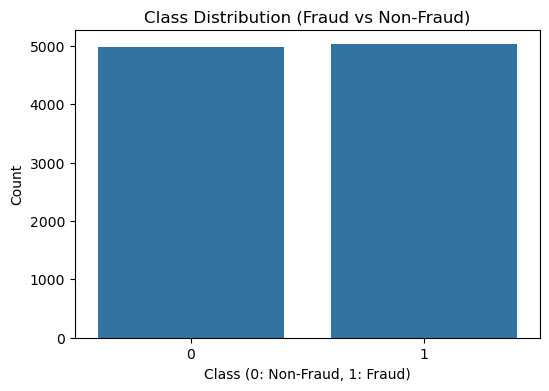

In [65]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_downsampled)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

In [83]:
df.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [16]:
params = {
    'n_estimators': [100, 200],
    'max_depth': range(2, 16),
    'min_samples_leaf': range(5,16),
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [17]:
rf = RandomForestClassifier(random_state=42)

grid_search = RandomizedSearchCV(estimator=rf, param_distributions=params,
                           verbose=4, random_state=42)

grid_search.fit(X_train_downsampled, y_train_downsampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=2, min_samples_leaf=12, n_estimators=200;, score=0.956 total time=   4.3s
[CV 2/5] END criterion=entropy, max_depth=2, min_samples_leaf=12, n_estimators=200;, score=0.945 total time=   4.1s
[CV 3/5] END criterion=entropy, max_depth=2, min_samples_leaf=12, n_estimators=200;, score=0.953 total time=   4.3s
[CV 4/5] END criterion=entropy, max_depth=2, min_samples_leaf=12, n_estimators=200;, score=0.938 total time=   4.3s
[CV 5/5] END criterion=entropy, max_depth=2, min_samples_leaf=12, n_estimators=200;, score=0.950 total time=   4.4s
[CV 1/5] END criterion=log_loss, max_depth=13, min_samples_leaf=6, n_estimators=200;, score=0.990 total time=  12.2s
[CV 2/5] END criterion=log_loss, max_depth=13, min_samples_leaf=6, n_estimators=200;, score=0.985 total time=  12.4s
[CV 3/5] END criterion=log_loss, max_depth=13, min_samples_leaf=6, n_estimators=200;, score=0.989 total time=  26.8s
[CV 4/5]

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(2, 16),
                                        'min_samples_leaf': range(5, 16),
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=4)

In [18]:
# 모델 파라미터

print(f'[searchCV.best_score_ ] {grid_search.best_score_}')
print(f'[searchCV.best_params_] {grid_search.best_params_}')
print(f'[searchCV.best_estimator_] {grid_search.best_estimator_}')

cv_resultDF = pd.DataFrame(grid_search.cv_results_)

[searchCV.best_score_ ] 0.9874
[searchCV.best_params_] {'n_estimators': 200, 'min_samples_leaf': 6, 'max_depth': 13, 'criterion': 'log_loss'}
[searchCV.best_estimator_] RandomForestClassifier(criterion='log_loss', max_depth=13, min_samples_leaf=6,
                       n_estimators=200, random_state=42)


In [19]:
best_model = grid_search.best_estimator_

In [20]:
train_pre = best_model.predict(X_train_downsampled)
test_pre = best_model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(classification_report(y_test, test_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.89      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
print(confusion_matrix(y_test, test_pre))

[[56591   273]
 [   11    87]]


In [24]:
importances = best_model.feature_importances_

In [25]:
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

In [26]:
importances

array([0.00536502, 0.00972667, 0.02709777, 0.06658262, 0.13455049,
       0.00638905, 0.00593634, 0.01887715, 0.00829663, 0.01870524,
       0.1245359 , 0.05195845, 0.10747439, 0.0057614 , 0.19779902,
       0.0032703 , 0.04822216, 0.09136751, 0.00775482, 0.00484079,
       0.0050679 , 0.01575871, 0.00354698, 0.00375486, 0.00317014,
       0.00318871, 0.00407353, 0.00725977, 0.00551104, 0.00415665])

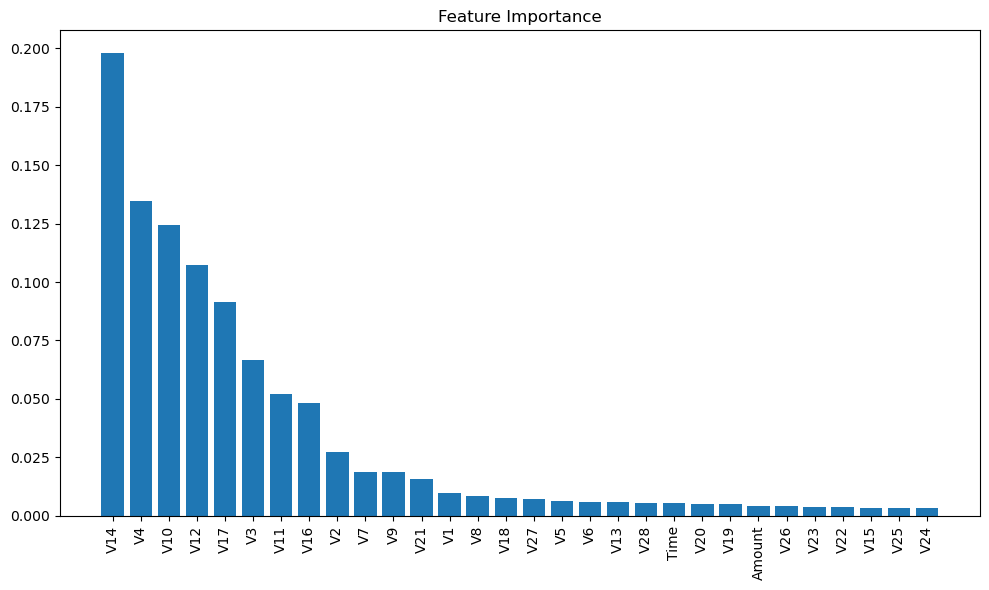

In [27]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [28]:
n = 14
top_n_features = feature_names[indices][:n]

In [29]:
X_train_top = X_train_downsampled[top_n_features]
X_test_top = X_test[top_n_features]

In [30]:
params = {
    'n_estimators': [100, 200],
    'max_depth': range(2, 16),
    'min_samples_split' : range(2,10),
    'min_samples_leaf': range(5,16),
    'criterion': ['gini', 'entropy', 'log_loss']
}

In [31]:
rf = RandomForestClassifier(random_state=42)

grid_search_top = RandomizedSearchCV(estimator=rf, param_distributions=params,n_iter=100,
                           verbose=4, random_state=42)

grid_search_top.fit(X_train_top, y_train_downsampled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=log_loss, max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.985 total time=  13.1s
[CV 2/5] END criterion=log_loss, max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.982 total time=  13.2s
[CV 3/5] END criterion=log_loss, max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.985 total time=  12.3s
[CV 4/5] END criterion=log_loss, max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.978 total time=  12.5s
[CV 5/5] END criterion=log_loss, max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=100;, score=0.987 total time=  12.8s
[CV 1/5] END criterion=log_loss, max_depth=12, min_samples_leaf=10, min_samples_split=3, n_estimators=100;, score=0.986 total time=  12.5s
[CV 2/5] END criterion=log_loss, max_depth=12, min_samples_leaf=10, min_samples_split=3, n_estimators=100;, 

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(2, 16),
                                        'min_samples_leaf': range(5, 16),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=4)

In [38]:
best_model = grid_search_top.best_estimator_

In [40]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=6,
                       min_samples_split=9, n_estimators=200, random_state=42)

In [41]:
print(f'[searchCV.best_score_ ] {grid_search.best_score_}')
print(f'[searchCV.best_params_] {grid_search.best_params_}')
print(f'[searchCV.best_estimator_] {grid_search.best_estimator_}')


[searchCV.best_score_ ] 0.9874
[searchCV.best_params_] {'n_estimators': 200, 'min_samples_leaf': 6, 'max_depth': 13, 'criterion': 'log_loss'}
[searchCV.best_estimator_] RandomForestClassifier(criterion='log_loss', max_depth=13, min_samples_leaf=6,
                       n_estimators=200, random_state=42)


In [42]:
train_pre_top=best_model.predict(X_train_top)
test_pre_top = best_model.predict(X_test_top)

In [43]:
print(confusion_matrix(y_test, test_pre_top))

[[56516   348]
 [   10    88]]


In [60]:
conf_matrix = confusion_matrix(y_test, test_pre_top)

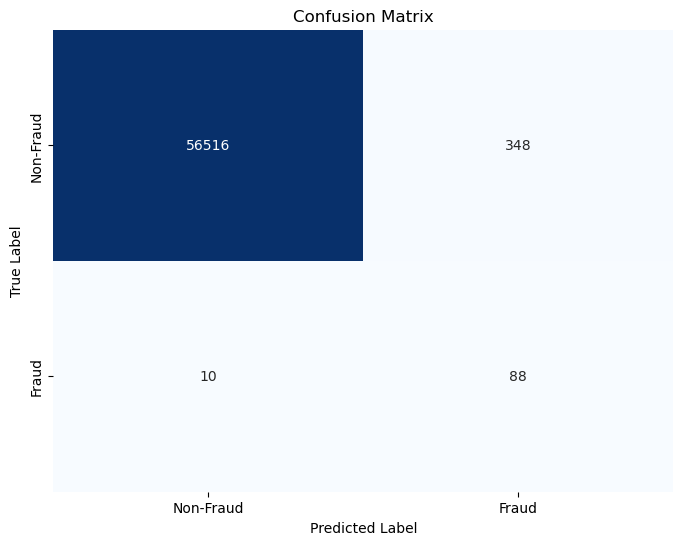

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [44]:
print(classification_report(y_test, test_pre_top))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.20      0.90      0.33        98

    accuracy                           0.99     56962
   macro avg       0.60      0.95      0.66     56962
weighted avg       1.00      0.99      1.00     56962



In [45]:
from sklearn.metrics import roc_curve, auc

In [48]:
best_model.predict_proba(X_test_top)

array([[0.98359952, 0.01640048],
       [0.95202   , 0.04798   ],
       [0.61430992, 0.38569008],
       ...,
       [0.99556061, 0.00443939],
       [1.        , 0.        ],
       [0.92495832, 0.07504168]])

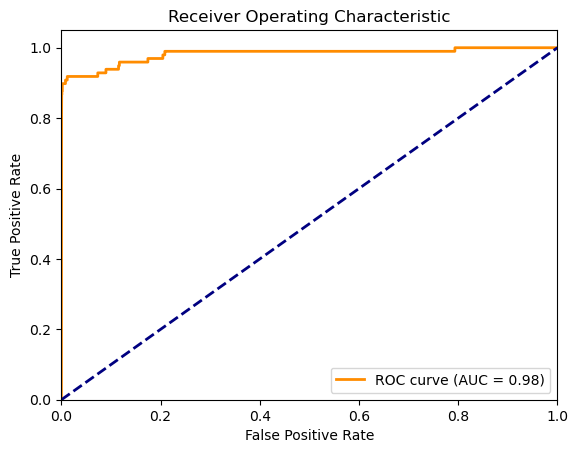

In [49]:
y_probs = best_model.predict_proba(X_test_top)[:, 1]  # 1번 클래스에 대한 확률

# 2. ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 3. ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 무작위 분류선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = best_model.predict_proba(X_test_top)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 Step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (35357,)
샘플 추출을 위한 임곗값 배열의 index 10개: [    0    15    30 ... 35325 35340 35355]
샘플용 10개의 임곗값:  [0.   0.   0.   ... 0.96 0.99 1.  ]
샘플 임곗값별 정밀도:  [0.002 0.002 0.002 ... 0.806 0.819 0.903]
샘플 임곗값별 재현율:  [1.    1.    1.    ... 0.806 0.694 0.571]


In [57]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

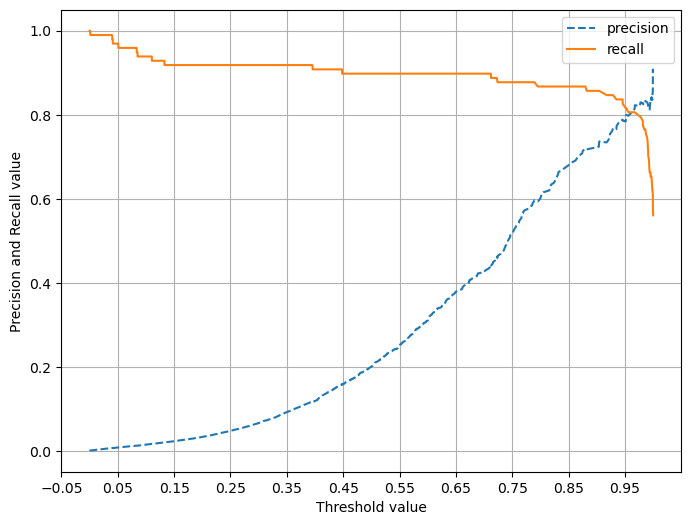

In [58]:
precision_recall_curve_plot(y_test, best_model.predict_proba(X_test_top)[:, 1])

임계값에 따른 정밀도와 재현율을 나타낸 그래프
X축은 분류 모델이 1로 예측할 때 사용한 임계값. 임계값이 낮을수록 더 많은 데이터 포인트를 1로 예측, 임계값이 높아지면 덩 ㅓㅁ격하게 1로 예측
정밀도(파란색 선): 모델이 1로 예측한 것 중 실제로 1인 것의 비율   
재현율(주황색 선): 실제로 1인 데이터 중에서 모델이 1로 비율 
 

재현율이 중요한 경우에는 낮은 임계값을 선택할 수 있습니다.
신용카드사기 예측모델의 경우 정밀도도 중요하지만 재현율을 높임으로써 사기를 예측할 수 있는것이 더 중요하다고 생각하였습니다>

In [54]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = best_model.predict_proba(X_test_top)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    6   11   16   21   26   31   36   41   46   51   56   61   66
   71   76   81   86   91   96  101  106  111  116  121  126  131  136
  141  146  151  156  161  166  171  176  181  186  191  196  201  206
  211  216  221  226  231  236  241  246  251  256  261  266  271  276
  281  286  291  296  301  306  311  316  321  326  331  336  341  346
  351  356  361  366  371  376  381  386  391  396  401  406  411  416
  421  426  431  436  441  446  451  456  461  466  471  476  481  486
  491  496  501  506  511  516  521  526  531  536  541  546  551  556
  561  566  571  576  581  586  591  596  601  606  611  616  621  626
  631  636  641  646  651  656  661  666  671  676  681  686  691  696
  701  706  711  716  721  726  731  736  741  746  751  756  761  766
  771  776  781  786  791  796  801  806  811  816  821  826  831  836
  841  846  851  856  861  866  871  876  881  886  891  896  901  906
  911  916  921  926  931  936  941  946  951  956  

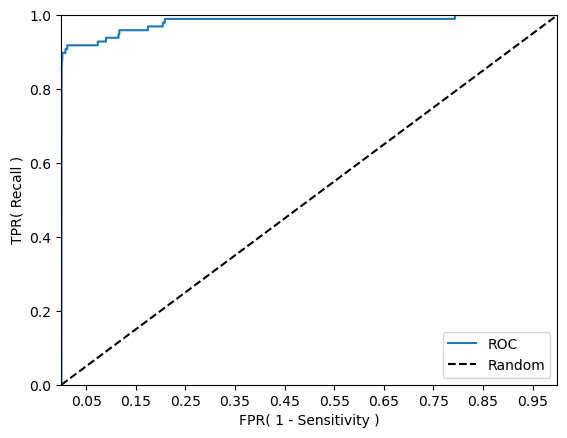

In [56]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, best_model.predict_proba(X_test_top)[:, 1] ) # 1번클래스에 대한 확률

X축 FPR은 실제로 사기 거래가 아닌것중 모델이 잘못해서 사기 거래로 예측한 비율을 나타냄
y축은 실제 사기거래중에서 모델이 올바르게 사기라고 예측한 비율을 나타냅니다.
ROC 곡선은 사기 탐지 모델이 얼마나 정확하게 사기 거래를 예측하고, 잘못된 경고를 얼마나 최소화하는지를 보여줍니다.

델이 사기 거래와 정상 거래를 거의 완벽하게 구분하고 있다는 뜻입니다.
모델의 실무 적용 의미:
이 모델은 신용카드 거래 데이터에서 사기 거래를 탐지하는 데 매우 높은 정확도를 보여줍니다.
실제로, TPR이 1에 가까운 구간에서 FPR은 0에 가까운 수준으로 유지되고 있습니다. 즉, 사기 거래를 정확히 탐지하는 동시에 정상 거래를 잘못된 사기로 탐지하는 비율을 최소화하고 있습니다.
실제 비즈니스적 해석:
이 모델을 실제 금융 기관에서 적용하면 사기 거래 탐지를 매우 신뢰할 수 있을 것입니다.

특히, AUC 값이 높기 때문에 고객에게 불필요한 불편을 초래하지 않으면서도 잠재적인 사기 거래를 효율적으로 차단할 수 있습니다.

이는 정상 거래 중에 발생하는 잘못된 경고를 최소화하면서도, 진짜 사기 거래를 놓치지 않기 위해 매우 높은 수준의 탐지 성능을 유지하는 것을 의미합니다.